In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import co2
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [3]:
# Retrieve CO2 dataset available from statsmodels
dataset = co2.load_pandas().data
dataset.index = pd.date_range(start='1958-03-29', periods=len(dataset), freq='W-SAT')
co2_data = dataset['co2']



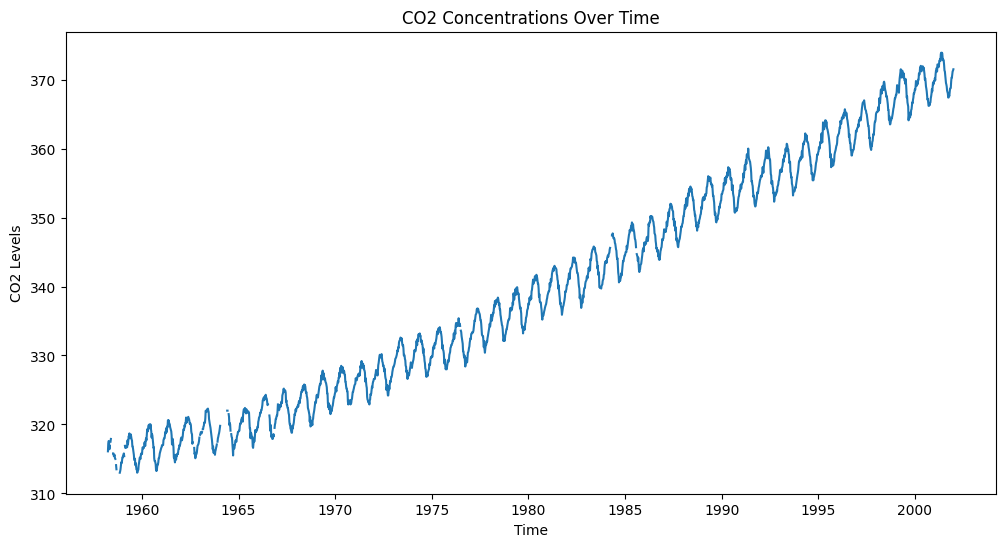

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(co2_data)
plt.title("CO2 Concentrations Over Time")
plt.xlabel("Time")
plt.ylabel("CO2 Levels")
plt.show()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


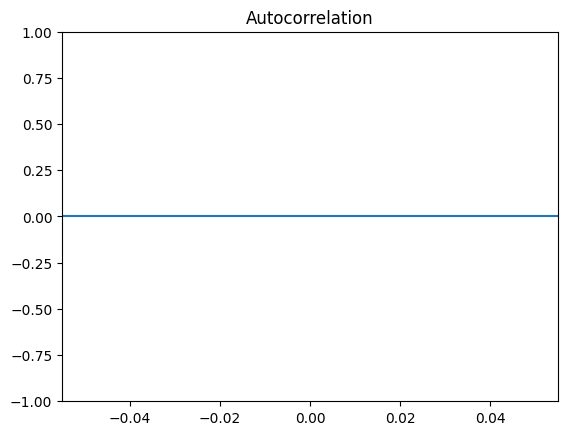

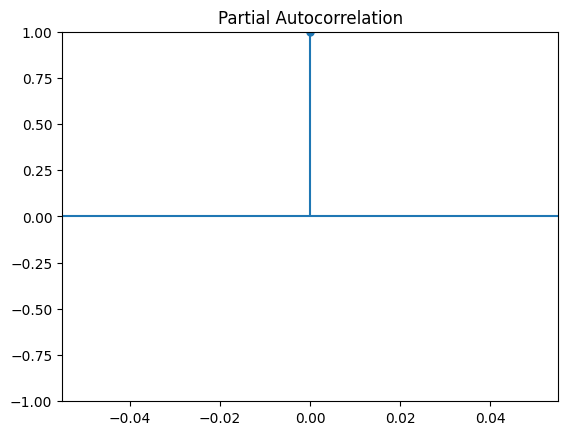

In [7]:
plot_acf(co2_data, lags=40)
plot_pacf(co2_data, lags=40)
plt.show()

In [8]:
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

In [9]:
model_instance = SARIMAX(co2_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_results = model_instance.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [10]:
train_split = int(len(co2_data) * 0.8)
training_data, test_data = co2_data[:train_split], co2_data[train_split:]


In [11]:
model_instance = SARIMAX(training_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_results = model_instance.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [12]:
prediction_start = len(training_data)
prediction_end = prediction_start + len(test_data) - 1
predicted_values = model_results.predict(start=prediction_start, end=prediction_end, dynamic=False)


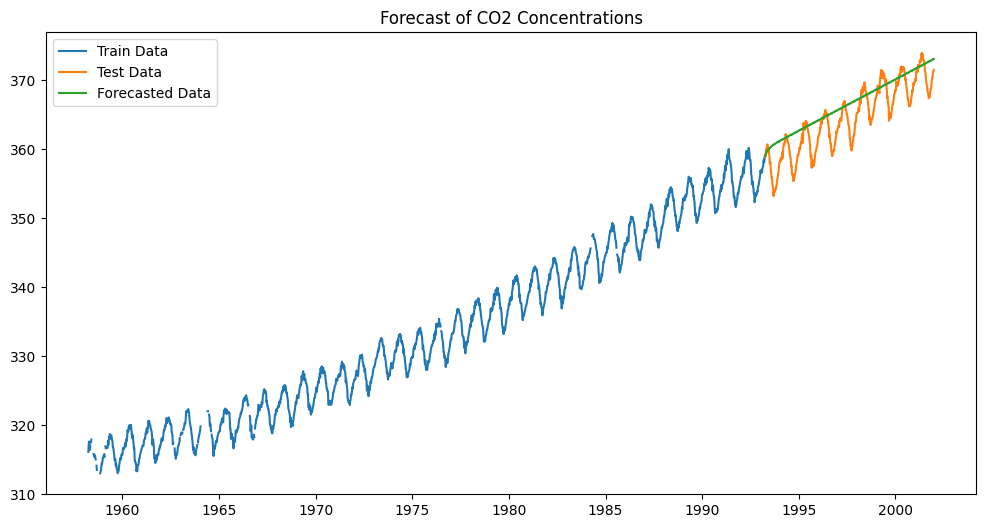

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(training_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(predicted_values, label='Forecasted Data')
plt.title("Forecast of CO2 Concentrations")
plt.legend()
plt.show()

In [14]:
mae_val = mean_absolute_error(test_data, predicted_values)
mse_val = mean_squared_error(test_data, predicted_values)
rmse_val = np.sqrt(mse_val)

In [15]:
print(f"MAE: {mae_val}")
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")

MAE: 2.4939010103704042
MSE: 9.976009020053295
RMSE: 3.158482075309799
